In [1]:
from tkinter import *
from tkinter import filedialog
import os
import tkinter as tk
from PIL import Image,ImageTk

import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
import tensorflow as tf
model=joblib.load('Brain_tumour_KNean_model.sav')

tumorLabel=4

Using TensorFlow backend.
E:\installed\setup\envs\tensorflow\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator KMeans from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


E:/downloadschrome/day_05/DAY 05/test_images/0 (237).jpg
NO. ofcontours  2586


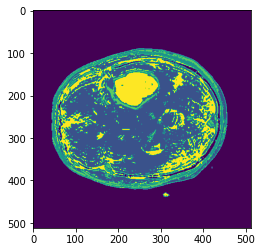

In [3]:
def show():
    #image importing for checking brain tumor
    fil=filedialog.askopenfilename(initialdir=os.getcwd(),title="Select Image File",filetypes=(("JPG FILE","*.jpg"),("PNG FILE","*.png"),("ALL FILES","*.*")))
    print(fil)
    
    imG=Image.open(fil)
    imG=ImageTk.PhotoImage(imG)
    lbl.configure(image=imG)
    lbl.image=imG  

        
    #prepraring image for model
    img=cv2.imread(fil,0)
    img_original=cv2.imread(fil)
    height,width=img.shape
    imgFlatten=img.reshape(height*width,1)
    labels=model.predict(imgFlatten)
    labels2D=labels.reshape(height,width)
    mask=(labels2D==tumorLabel)
    plt.imshow(labels2D)
    
    #recognizing tumor
    tumorExtracted=np.bitwise_and(mask,img)
    contours,hiearachy=cv2.findContours(tumorExtracted,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print(f'NO. ofcontours ',len(contours))

    for index,cnt in enumerate(contours):
        area=cv2.contourArea(cnt)

        if area>1000:
            cv2.drawContours(img_original,cnt,-1,(0,255,255),2)
            x,y,w,h=cv2.boundingRect(cnt)
            cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.rectangle(img_original,(x,y),(x+120,y-49),(0,255,0),-1)
            cv2.putText(img_original,'TUMOR',(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)

    
    cv2.imshow('LIVE',img_original)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

MEDIUM_FONT=('verdana',10)
root=Tk()
frm=Frame(root)
frm.pack(side=BOTTOM,padx=15,pady=15)

lbl=Label(root)
lbl.pack()

btn= Button(frm,text="Browse Image",command=show)
btn.pack(side=tk.LEFT)

btn2= Button(frm,text="EXIT",command=root.destroy)
btn2.pack(side=tk.LEFT,padx=10)

root.title("Brain Tumor Detection Using Image Segmentation")
root.geometry('600x650')
root.mainloop()
